In [ ]:
def print_arrays():
    print("Array of right derivative values: " + str(counting_derivative_right()))
    print("Array of x values: " + str(x))
    print("Array of right derivative values: " + str(counting_derivative_right()))
    print("Array of left derivative values: " + str(counting_derivative_left()))
    print("Array of central derivative values: " + str(counting_derivative_central()))
    print("Array of derivative values: " + str(counting_derivative_func()) + "\n")


def print_deviations():
    print("Central deviation: " + str(counting_deviationC()))
    print("Left deviation: " + str(counting_deviationL()))
    print("Right deviation: " + str(counting_deviationR()) + "\n")


def print_integrals():
    print("Left rectangle method: ", left_rectangle())
    print("Right rectangle method: ", right_rectangle())
    print("Middle rectangle method: ", middle_rectangle())
    print("Trapezoid rectangle method: ", trapezoid_formula())
    print("Simpson's formula: ", simpsons_formula())
    print("Analytic integral: ", analytic_integral(), "\n")

In [ ]:
import math
import numpy as np
from scipy.integrate import quad 
from sympy import *
from sympy import diff, Symbol
import sympy.parsing.sympy_parser

print("Please, enter the value of the beginning of the segment")
a = int(input())
print("Please, enter the value of the ending of the segment")
b = int(input())
print("Please, enter a partition value")
h = float(input())

print("Please, enter a function")
user_string = input()

my_symbols = {'x': Symbol('x', real=True)}
x = []

Please, enter the value of the beginning of the segment
4
Please, enter the value of the ending of the segment
8
Please, enter a partition value
0.75
Please, enter a function
x**3+5*x-1


In [ ]:
def update_x():
    n = update_n()
    x.clear()
    for i in range(0, n + 1):
      if a + h * i <= b :
        x.append(a + h * i)
      elif a + h * i > b :
        x.append(b)
      else :
        print("Error!")
    return x


def update_n():
    n = math.ceil((b - a) / h)
    return n


def function():
    return sympy.parsing.sympy_parser.parse_expr(user_string, my_symbols)


def dif_function():
    my_func = sympy.parsing.sympy_parser.parse_expr(user_string, my_symbols)
    return diff(my_func, my_symbols['x'])


def function_point(z):
    symbol_x = Symbol('x')
    f = lambdify(symbol_x, user_string)
    return f(z)


def dif_function_point(z):
    f = lambdify(my_symbols['x'], dif_function())
    return f(z)


def counting_derivative_right():
    update_x()
    derivative_right = []
    for index in x:
        derivative_right.append((function_point(index + h) - function_point(index)) / h)
    return derivative_right


def counting_derivative_left():
    update_x()
    derivative_left = []
    for i in x:
        derivative_left.append((function_point(i) - function_point(i - h)) / h)
    return derivative_left


def counting_derivative_central():
    update_x()
    derivative_central = []
    for i in x:
        derivative_central.append((function_point(i + h) - function_point(i - h)) / (2 * h))
    return derivative_central


def counting_derivative_func():
    update_x()
    derivative_func = []
    for i in x:
        derivative_func.append(dif_function_point(i))
    return derivative_func


def counting_deviationC():
    derivative_central = counting_derivative_central()
    derivative_func = counting_derivative_func()
    deviation_c = (set(derivative_central) - set(derivative_func))
    return np.std(list(deviation_c))


def counting_deviationL():
    derivative_left = counting_derivative_left()
    derivative_func = counting_derivative_func()
    deviation_l = (set(derivative_func) - set(derivative_left))
    return np.std(list(deviation_l))


def counting_deviationR():
    derivative_right = counting_derivative_right()
    derivative_func = counting_derivative_func()
    deviation_r = (set(derivative_right) - set(derivative_func))
    return np.std(list(deviation_r))


def left_rectangle():
    integralsum = 0
    for i in np.arange(a, b + 1, h):
        integral = h * function_point(i - 1)
        integralsum += integral
    return integralsum


def right_rectangle():
    integrals = 0
    for i in np.arange(a, b + 1, h):
        integral = h * function_point(i)
        integrals += integral
    return integrals


def middle_rectangle():
    integrals = 0
    for i in np.arange(a, b + 1, h):
        integral = h * function_point((i - 0.5))
        integrals += integral
    return integrals


def trapezoid_formula():
    integrals = 0
    for i in np.arange(a, b + 1, h):
        integral = h / 2 * (function_point(i - 1) + function_point(i))
        integrals += integral
    return integrals


def simpsons_formula():
    integrals = 0
    for i in np.arange(a, b + 1, h):
        integral = h / 6 * (function_point(i - 1) + 4 * function_point(i - 0.5) + function_point(i))
        integrals += integral
    return integrals


def analytic_integral():
    v, err = quad(function_point, a, b)
    return v

In [ ]:
import seaborn as sns

deviations_right = []
deviations_left = []
deviations_central = []
h_values = []
x = []

print_arrays()

print("Now h is: ", h)
print_deviations()

deviations_right.append(counting_deviationR())
deviations_left.append(counting_deviationL())
deviations_central.append(counting_deviationC())
h_values.append(h)

Array of right derivative values: [62.5625, 83.9375, 108.6875, 136.8125, 168.3125, 203.1875, 215.5625]
Array of x values: [4.0, 4.75, 5.5, 6.25, 7.0, 7.75, 8]
Array of right derivative values: [62.5625, 83.9375, 108.6875, 136.8125, 168.3125, 203.1875, 215.5625]
Array of left derivative values: [44.5625, 62.5625, 83.9375, 108.6875, 136.8125, 168.3125, 179.5625]
Array of central derivative values: [53.5625, 73.25, 96.3125, 122.75, 152.5625, 185.75, 197.5625]
Array of derivative values: [53.0, 72.6875, 95.75, 122.1875, 152.0, 185.1875, 197]

Now h is:  0.75
Central deviation: 51.155889824882436
Left deviation: 51.155889824882436
Right deviation: 54.29289191270712



<Axes: >

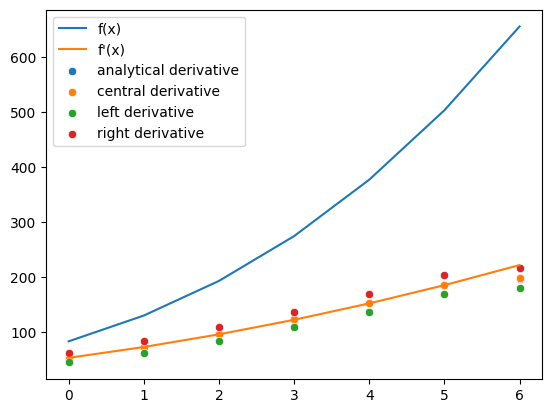

In [ ]:
x=[]
der_func = counting_derivative_func()
der_cent = counting_derivative_central()
der_left = counting_derivative_left()
der_right = counting_derivative_right()
x = np.arange(a, b+h, h)
sns.lineplot(function_point(x), legend='brief', label='f(x)')
sns.lineplot(dif_function_point(x), legend='brief', label="f'(x)")
sns.scatterplot(der_func, legend='brief', label='analytical derivative')
sns.scatterplot(der_cent, legend='brief', label='central derivative')
sns.scatterplot(der_left, legend='brief', label='left derivative')
sns.scatterplot(der_right, legend='brief', label='right derivative')

In [ ]:
x = []
h_saver = h
h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_deviations()

deviations_right.append(counting_deviationR())
deviations_left.append(counting_deviationL())
deviations_central.append(counting_deviationC())
h_values.append(h)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_deviations()

deviations_right.append(counting_deviationR())
deviations_left.append(counting_deviationL())
deviations_central.append(counting_deviationC())
h_values.append(h)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_deviations()

deviations_right.append(counting_deviationR())
deviations_left.append(counting_deviationL())
deviations_central.append(counting_deviationC())
h_values.append(h)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_deviations()

deviations_right.append(counting_deviationR())
deviations_left.append(counting_deviationL())
deviations_central.append(counting_deviationC())
h_values.append(h)

Now h is:  0.375
Central deviation: 46.437896110724374
Left deviation: 46.437896110724374
Right deviation: 47.870139888752675

Now h is:  0.1875
Central deviation: 44.96293557684247
Left deviation: 44.96293557684247
Right deviation: 45.654858819897264

Now h is:  0.09375
Central deviation: 43.073126839767184
Left deviation: 43.073126839767184
Right deviation: 43.40633057084186

Now h is:  0.046875
Central deviation: 42.618575542494526
Left deviation: 42.618575542494526
Right deviation: 42.78340484614979



In [ ]:
integrals_right = []
integrals_left = []
integrals_middle = []
integrals_trapezoid = []
integrals_simpson = []
n_values = []
x = []

h = h_saver
n = update_n()
x = update_x()
print("Now h is: ", h)
print_integrals()

integrals_right.append(right_rectangle())
integrals_left.append(left_rectangle())
integrals_middle.append(middle_rectangle())
integrals_trapezoid.append(trapezoid_formula())
integrals_simpson.append(simpsons_formula())
n_values.append(n)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_integrals()
integrals_right.append(right_rectangle())
integrals_left.append(left_rectangle())
integrals_middle.append(middle_rectangle())
integrals_trapezoid.append(trapezoid_formula())
integrals_simpson.append(simpsons_formula())
n_values.append(n)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_integrals()
integrals_right.append(right_rectangle())
integrals_left.append(left_rectangle())
integrals_middle.append(middle_rectangle())
integrals_trapezoid.append(trapezoid_formula())
integrals_simpson.append(simpsons_formula())
n_values.append(n)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_integrals()

integrals_right.append(right_rectangle())
integrals_left.append(left_rectangle())
integrals_middle.append(middle_rectangle())
integrals_trapezoid.append(trapezoid_formula())
integrals_simpson.append(simpsons_formula())
n_values.append(n)

h /= 2
n = update_n()
x = update_x()
print("Now h is: ", h)
print_integrals()

integrals_right.append(right_rectangle())
integrals_left.append(left_rectangle())
integrals_middle.append(middle_rectangle())
integrals_trapezoid.append(trapezoid_formula())
integrals_simpson.append(simpsons_formula())
n_values.append(n)

Now h is:  0.75
Left rectangle method:  1078.30078125
Right rectangle method:  1662.03515625
Middle rectangle method:  1347.52734375
Trapezoid rectangle method:  1370.16796875
Simpson's formula:  1355.07421875
Analytic integral:  1076.0 

Now h is:  0.375
Left rectangle method:  1177.215087890625
Right rectangle method:  1796.017822265625
Middle rectangle method:  1463.237548828125
Trapezoid rectangle method:  1486.616455078125
Simpson's formula:  1471.030517578125
Analytic integral:  1076.0 

Now h is:  0.1875
Left rectangle method:  1122.590835571289
Right rectangle method:  1716.979751586914
Middle rectangle method:  1397.2413482666016
Trapezoid rectangle method:  1419.7852935791016
Simpson's formula:  1404.7559967041016
Analytic integral:  1076.0 

Now h is:  0.09375
Left rectangle method:  1146.7094736099243
Right rectangle method:  1749.6191110610962
Middle rectangle method:  1425.4423685073853
Trapezoid rectangle method:  1448.1642923355103
Simpson's formula:  1433.0163431167603

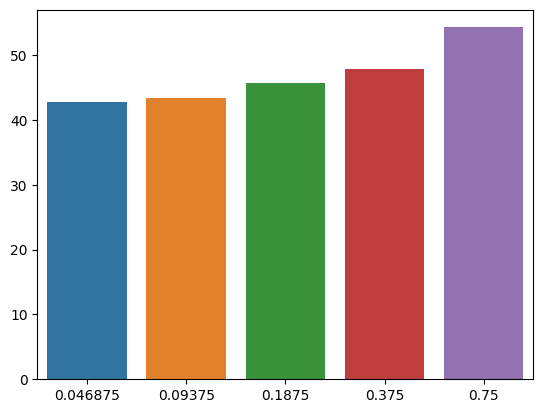

In [ ]:
sns.barplot(x = h_values, y = deviations_right);

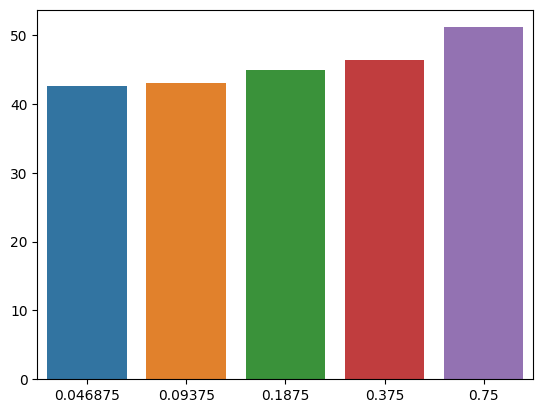

In [ ]:
sns.barplot(x = h_values, y = deviations_left);

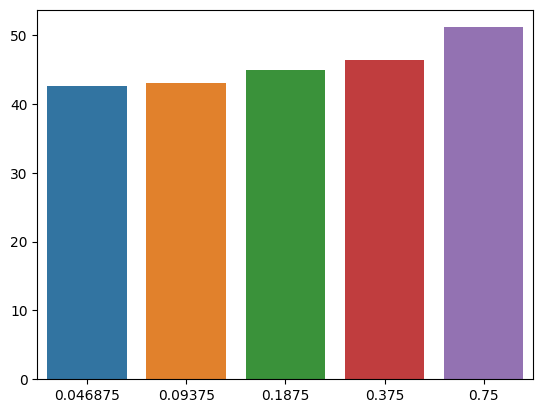

In [ ]:
sns.barplot(x = h_values, y = deviations_central);

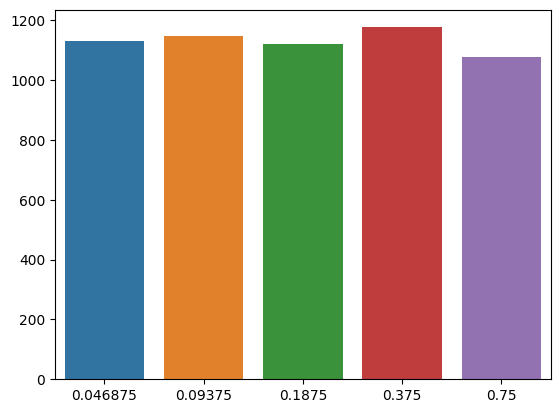

In [ ]:
sns.barplot(x = h_values, y = integrals_left);

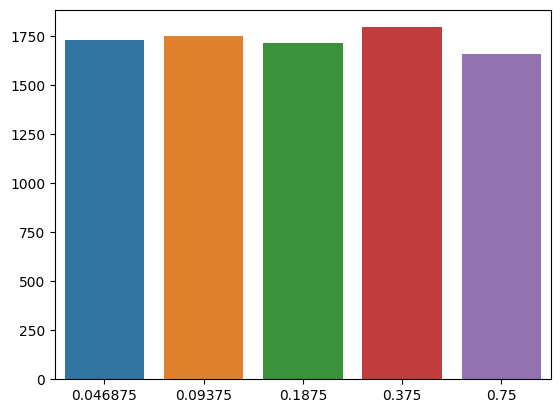

In [ ]:
sns.barplot(x = h_values, y = integrals_right);

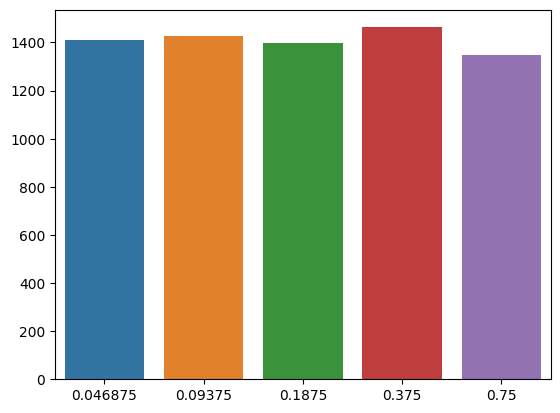

In [ ]:
sns.barplot(x = h_values, y = integrals_middle);

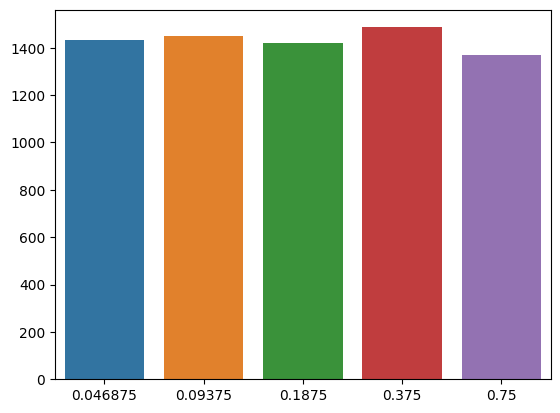

In [ ]:
sns.barplot(x = h_values, y = integrals_trapezoid);

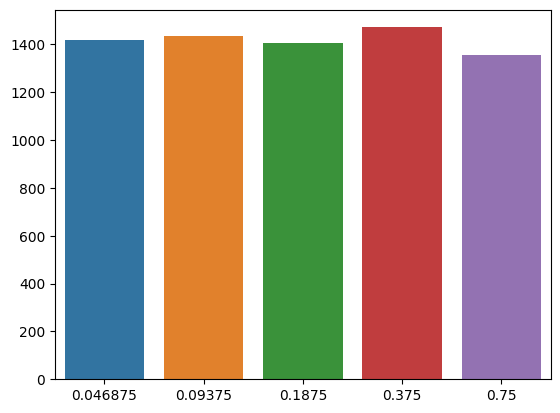

In [ ]:
sns.barplot(x = h_values, y = integrals_simpson);